In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = pd.read_csv('crimes2018.csv',sep=',',low_memory=False)
wine = wine[:40000]
wine = wine.drop('ID',axis = 1)
wine = wine.drop('Case Number',axis = 1)
wine = wine.drop('District',axis = 1)
wine = wine.drop('Ward',axis = 1)
wine = wine.drop('X Coordinate',axis = 1)
wine = wine.drop('Y Coordinate',axis = 1)
wine = wine.drop('Updated On',axis = 1)
wine = wine.drop('Longitude',axis = 1)
wine = wine.drop('Latitude',axis = 1)
wine = wine.drop('Location',axis = 1)

In [3]:
wine.isnull().sum()

Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    332
Arrest                    0
Domestic                  0
Beat                      0
Community Area            0
FBI Code                  0
Year                      0
dtype: int64

In [4]:
wine = wine.dropna()

In [5]:
wine.isnull().sum()

Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
Community Area          0
FBI Code                0
Year                    0
dtype: int64

In [6]:
wine.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Community Area,FBI Code,Year
0,09/01/2018 12:00:00 AM,110XX S WENTWORTH AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,True,513,49.0,17,2018
1,06/10/2018 11:00:00 PM,053XX S CALUMET AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,231,40.0,02,2018
2,05/12/2018 12:43:00 PM,008XX N HOYNE AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1212,24.0,05,2018
3,01/28/2018 04:10:00 PM,028XX S STATE ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,CHA APARTMENT,True,False,133,35.0,02,2018
4,12/24/2018 11:30:00 PM,032XX W CONGRESS PKWY,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,1134,27.0,06,2018


In [7]:
for index, row in wine.iterrows():
    if('AIRPORT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'AIRPORT';
    elif('SCHOOL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'SCHOOL';
    elif('COLLEGE/UNIVERSITY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'SCHOOL';
    elif('RESIDENTIAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('APARTMENT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('RESIDENCE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('CHA' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'RESIDENTIAL';
    elif('STORE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BAR' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BARBERSHOP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BOWLING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CAR WASH' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('WORSHIP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('COIN' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CREDIT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CURRENCY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('DAY CARE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('GAS STATION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('HOTEL/MOTEL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('LIBRARY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('MOVIE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SHOP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('POOL ROOM' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('RESTAURANT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SAVINGS' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('SPORTS' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('WAREHOUSE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('DEALERSHIP' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('BANK' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'COMMERCIAL';
    elif('CTA' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('TRANSPORTATION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('RAILROAD' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('PARKING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('TAXICAB' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('VEHICLE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'TRANSPORT';
    elif('CONSTRUCTION' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('FACTORY/MANUFACTURING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('WAREHOUSE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('ABANDONED' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'INDUSTRIAL';
    elif('HOSPITAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('CEMETARY' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('FEDERAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('FIRE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('POLICE' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('JAIL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('GOVERNMENT' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('MEDICAL/DENTAL' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('NURSING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    elif('NURSING' in row['Location Description']):
        wine.loc[index, 'Location Description'] = 'GOVERNMENT';
    else:
        wine.loc[index, 'Location Description'] = 'OTHER';
         

In [8]:
#Encoder to convert string values
le = LabelEncoder()

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39668 entries, 0 to 39999
Data columns (total 12 columns):
Date                    39668 non-null object
Block                   39668 non-null object
IUCR                    39668 non-null object
Primary Type            39668 non-null object
Description             39668 non-null object
Location Description    39668 non-null object
Arrest                  39668 non-null bool
Domestic                39668 non-null bool
Beat                    39668 non-null int64
Community Area          39668 non-null float64
FBI Code                39668 non-null object
Year                    39668 non-null int64
dtypes: bool(2), float64(1), int64(2), object(7)
memory usage: 4.7+ MB


In [10]:
X = wine.drop('Location Description', axis = 1)
y = wine['Location Description']
def dummyEncode(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object','bool']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
    
X = dummyEncode(X)
X.head()

,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,Community Area,FBI Code,Year
0,18979,14804,165,20,78,0,1,513,49.0,19,2018
1,17933,10241,10,5,146,0,0,231,40.0,2,2018
2,17687,2004,65,3,104,0,0,1212,24.0,6,2018
3,8272,6310,2,5,27,1,0,133,35.0,2,2018
4,20830,7062,70,27,0,0,0,1134,27.0,7,2018


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:10]

array([[ 0.04038089,  1.17328512, -1.41319087,  0.99675745, -1.23466052,
        -0.52764681, -0.43513346, -1.16371894,  0.31864576, -1.36277026,
         0.        ],
       [ 1.1265009 ,  1.34245342,  0.46122072, -0.74479818,  1.20629653,
         1.89520715,  2.29814549, -0.7496874 ,  0.36502362,  0.67977354,
         0.        ],
       [-0.53988927, -0.5146678 , -0.68818261, -1.22856363,  0.74198405,
        -0.52764681, -0.43513346, -1.05028564,  0.41140148, -0.42005774,
         0.        ],
       [-1.11287352, -0.27813936,  1.38074338,  0.60974508,  0.34400192,
        -0.52764681, -0.43513346, -0.17259549, -0.28426645,  1.62248607,
         0.        ],
       [ 1.67780092,  0.37900596,  1.80513846,  0.31948581,  0.59605727,
         1.89520715, -0.43513346, -0.05916219, -0.60891149,  1.30824856,
         0.        ],
       [-1.2332644 , -0.83654833, -1.34245836,  0.99675745,  1.03383761,
        -0.52764681, -0.43513346,  1.95853261, -0.60891149, -1.36277026,
         0.   

In [16]:
#Neural Network
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

              precision    recall  f1-score   support

     AIRPORT       0.32      0.22      0.26        45
  COMMERCIAL       0.64      0.49      0.56      1171
  GOVERNMENT       1.00      0.04      0.09       112
  INDUSTRIAL       0.00      0.00      0.00        19
       OTHER       0.55      0.76      0.64      2720
 RESIDENTIAL       0.69      0.73      0.71      2975
      SCHOOL       0.60      0.15      0.24       182
   TRANSPORT       0.49      0.03      0.05       710

    accuracy                           0.61      7934
   macro avg       0.54      0.30      0.32      7934
weighted avg       0.62      0.61      0.58      7934

[[  10    9    0    0   18    8    0    0]
 [   1  575    0    0  315  268    3    9]
 [   0   28    5    0   52   24    3    0]
 [   0    3    0    0    5   10    0    1]
 [   6  129    0    0 2077  494    5    9]
 [  10   99    0    0  701 2160    4    1]
 [   0   14    0    0   87   53   28    0]
 [   4   43    0    0  546   94    4   19]]
0.61

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


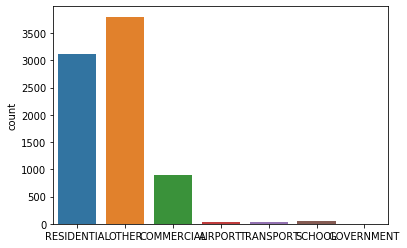

In [17]:
#Lets see how our model preformed
print(classification_report(y_test, pred_mlpc)) #Shows accuracy of model
print(confusion_matrix(y_test, pred_mlpc))
print(accuracy_score(y_test, pred_mlpc))
sns.countplot(pred_mlpc)